In [ ]:
import random

In [ ]:
random.seed(42)

In [ ]:
def generate_probabilities(num_faces=6):
    cut_points = [random.random() for _ in range(num_faces - 1)]
    cut_points.extend([0, 1])
    cut_points.sort()
    probabilities = [cut_points[i + 1] - cut_points[i] for i in range(len(cut_points) - 1)]
    return probabilities

def roll(probabilities):
    # Generate a random float in the range [0, 1)
    roll = random.random()

    # Cumulative probability range
    cumulative = 0
    for i, p in enumerate(probabilities):
        cumulative += p
        if roll < cumulative:
            return i + 1  # returning 'i + 1' to represent the dice face

In [ ]:
die1 = generate_probabilities(6)
die2 = generate_probabilities(6)
die3 = generate_probabilities(7)
die4 = generate_probabilities(7)
die5 = generate_probabilities(8)
die6 = generate_probabilities(8)

In [ ]:
dice = [die1, die2, die3, die4, die5, die6]

In [ ]:
import random
import matplotlib.pyplot as plt

# Assuming you have a function roll() and a list dice[] defined somewhere

total = 0
cumulative_totals = []  # List to store the cumulative totals

for i in range(1000):
  chosen_die = random.randint(0, 5)
  roll_die = roll(dice[chosen_die - 1])
  total += roll_die
  cumulative_totals.append(total)  # Store the cumulative total

print(total)

4223


In [ ]:
total2 = 0
cumulative_totals2 = []
Q = [0, 0, 0, 0, 0, 0]
chosen_dice_freq = [0, 0, 0, 0, 0, 0]

epsilon = 0.2

for i in range(1000):
  if random.random() < epsilon:
    chosen_die = random.randint(0, 5)
  else:
    chosen_die = Q.index(max(Q))

  roll_die = roll(dice[chosen_die])

  chosen_dice_freq[chosen_die] += 1

  # new_estimate = old_estimate + step_size * (target - old_estimate)
  Q[chosen_die] = Q[chosen_die] + (1 / chosen_dice_freq[chosen_die]) * (roll_die - Q[chosen_die])

  total2 += roll_die
  cumulative_totals2.append(total2)

print(Q)
print(chosen_dice_freq)
print(total2)

[4.223529411764704, 4.181818181818181, 5.03125, 3.857142857142858, 5.131210191082804, 3.1]
[85, 33, 32, 35, 785, 30]
4914


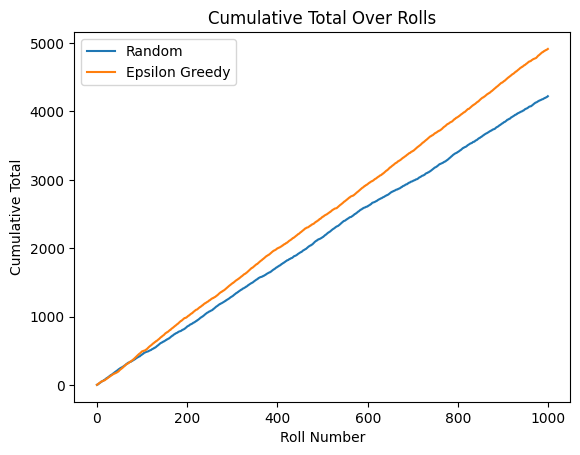

In [ ]:
plt.plot(cumulative_totals)
plt.plot(cumulative_totals2)
plt.xlabel('Roll Number')
plt.ylabel('Cumulative Total')
plt.title('Cumulative Total Over Rolls')
plt.legend(['Random', 'Epsilon Greedy'])
plt.show()